In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')
df.head(30)


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [44]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Remplacer les NaN des années par médiane/moyenne et convertir en int?

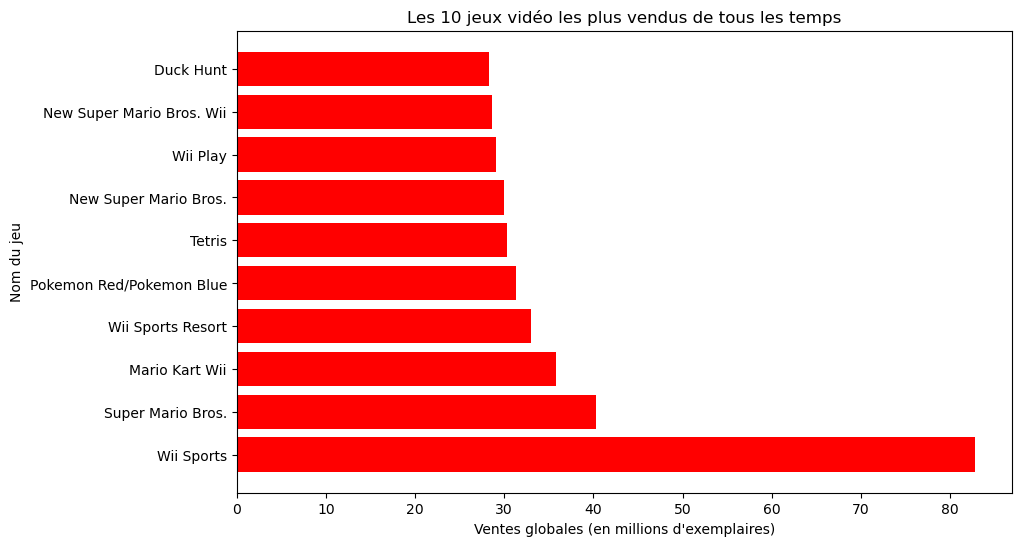

In [55]:
# Sélectionner les jeux les plus vendus
top_selling = df.sort_values('Global_Sales', ascending=False).head(10)

# Créer un graphique en barres horizontales
plt.figure(figsize=(10,6))
plt.barh(top_selling['Name'], top_selling['Global_Sales'], color='red')

# Ajouter des labels et titres
plt.xlabel('Ventes globales (en millions d\'exemplaires)')
plt.ylabel('Nom du jeu')
plt.title('Les 10 jeux vidéo les plus vendus de tous les temps')

plt.show()


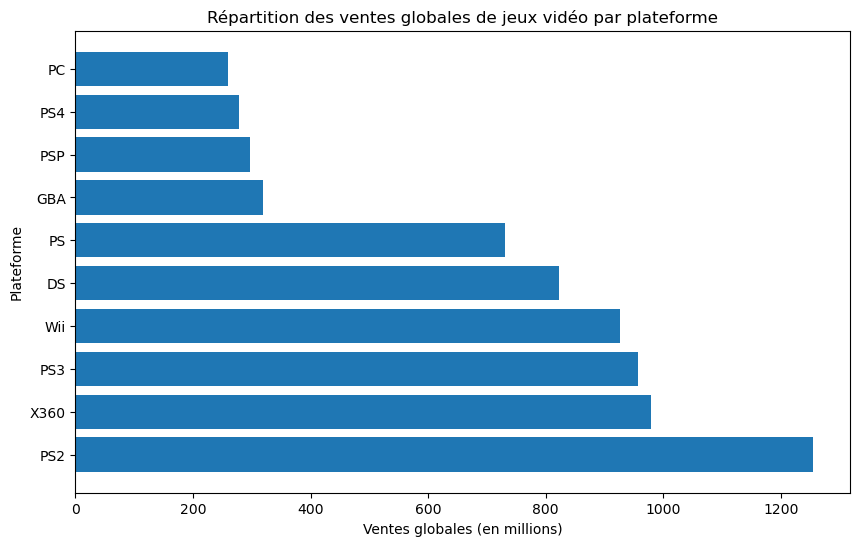

In [49]:
import matplotlib.pyplot as plt

platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 6))
plt.barh(platform_sales.index, platform_sales.values)
plt.title('Répartition des ventes globales de jeux vidéo par plateforme')
plt.xlabel('Ventes globales (en millions)')
plt.ylabel('Plateforme')
plt.show()

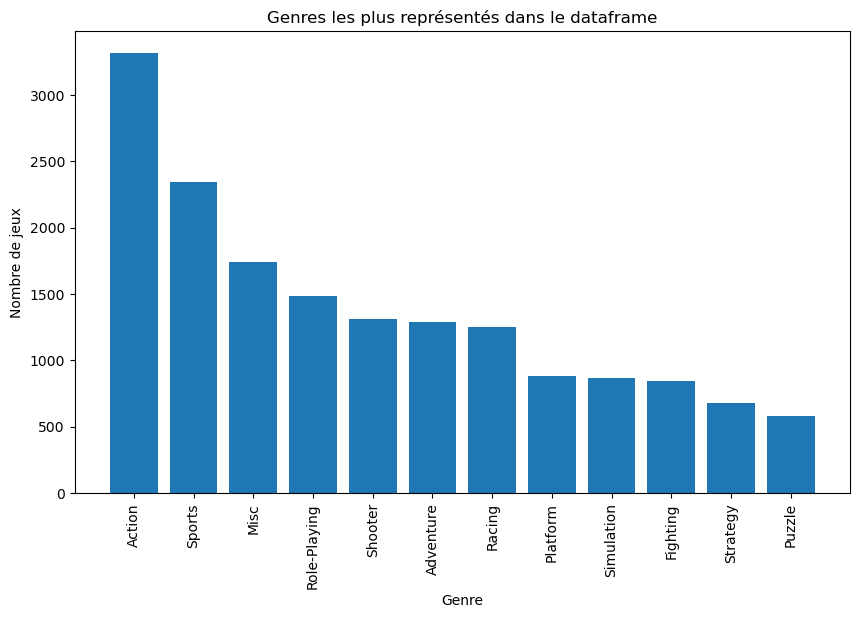

In [52]:
import matplotlib.pyplot as plt

# Compter le nombre de jeux par genre
genre_count = df['Genre'].value_counts()

# Créer un graphique en barres
plt.figure(figsize=(10,6))
plt.bar(genre_count.index, genre_count.values)

# Ajouter des labels et titres
plt.xlabel('Genre')
plt.ylabel('Nombre de jeux')
plt.title('Genres les plus représentés dans le dataframe')
plt.xticks(rotation=90)

plt.show()

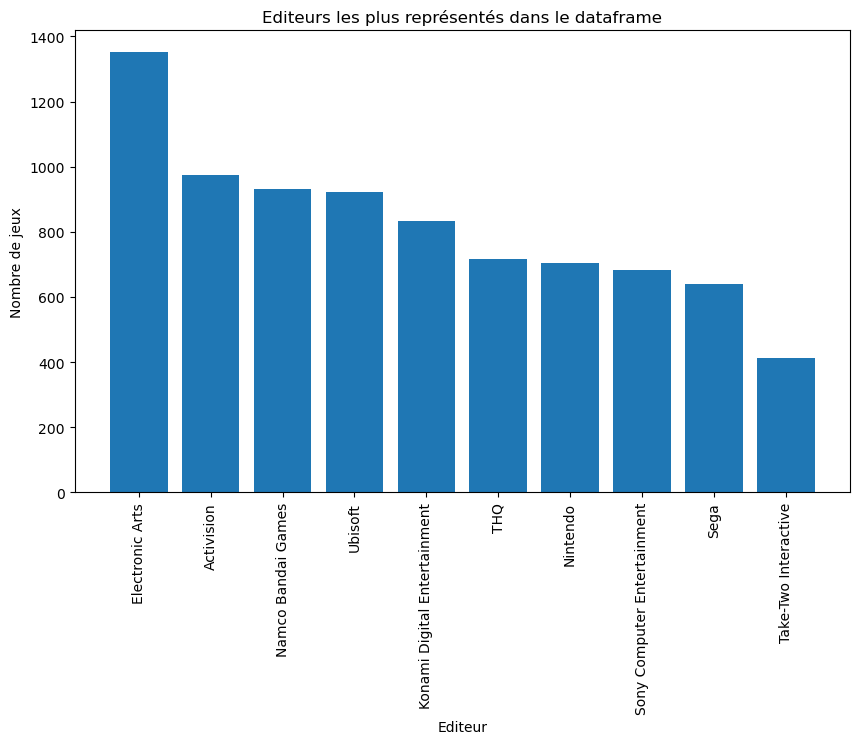

In [53]:
# Compter le nombre de jeux par éditeur
publisher_count = df['Publisher'].value_counts().head(10)

# Créer un graphique en barres
plt.figure(figsize=(10,6))
plt.bar(publisher_count.index, publisher_count.values)

# Ajouter des labels et titres
plt.xlabel('Editeur')
plt.ylabel('Nombre de jeux')
plt.title('Editeurs les plus représentés dans le dataframe')
plt.xticks(rotation=90)

plt.show()

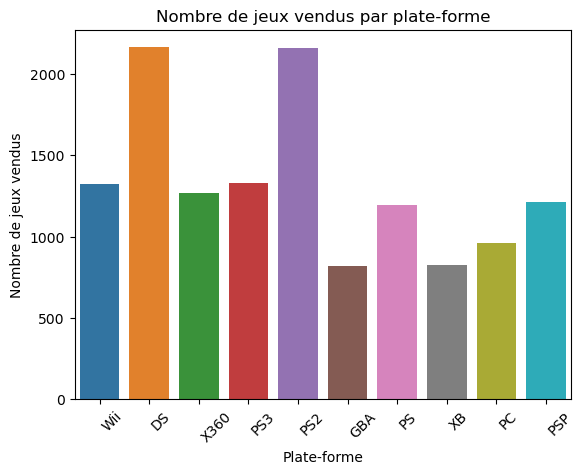

In [50]:
# Sélection des 10 plateformes les plus populaires
top_platforms = df['Platform'].value_counts().nlargest(10).index.tolist()

# Diagramme à barres pour le nombre de jeux vendus par plate-forme
sns.countplot(x='Platform', data=df[df['Platform'].isin(top_platforms)])
plt.title('Nombre de jeux vendus par plate-forme')
plt.xlabel('Plate-forme')
plt.ylabel('Nombre de jeux vendus')
plt.xticks(rotation=45, ha='left')
plt.show()

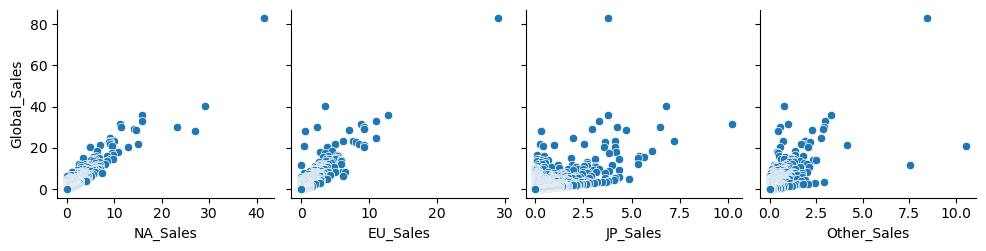

In [51]:
# Nuage de points pour la corrélation entre les ventes mondiales et les ventes par région
sns.pairplot(df, x_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], y_vars='Global_Sales', kind='scatter')
plt.show()

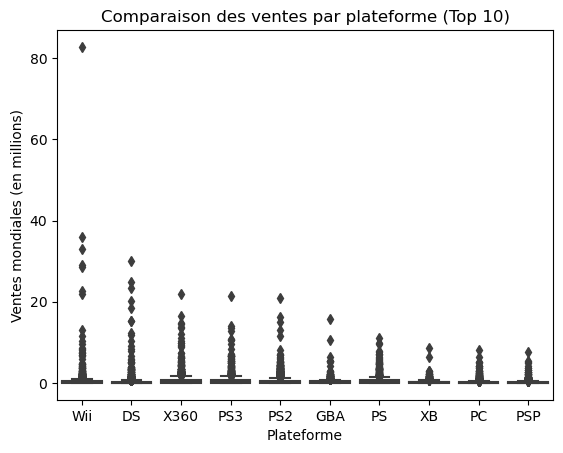

In [25]:
sns.boxplot(x='Platform', y='Global_Sales', data=df[df['Platform'].isin(top_platforms)])
plt.title('Comparaison des ventes par plateforme (Top 10)')
plt.xlabel('Plateforme')
plt.ylabel('Ventes mondiales (en millions)')
plt.show()

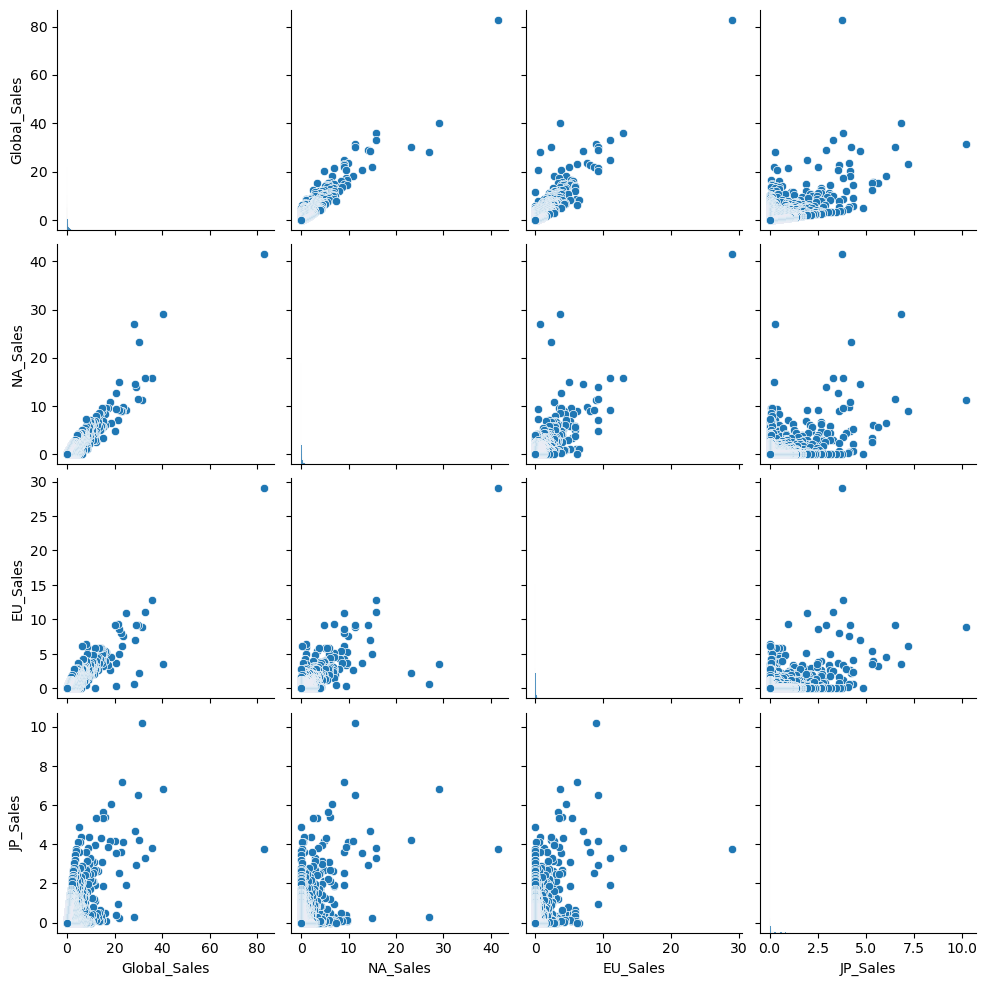

In [26]:
# Pair plot pour visualiser la corrélation entre les ventes mondiales, les ventes en Amérique du Nord,
# les ventes en Europe et les ventes au Japon
sns.pairplot(df[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales']])

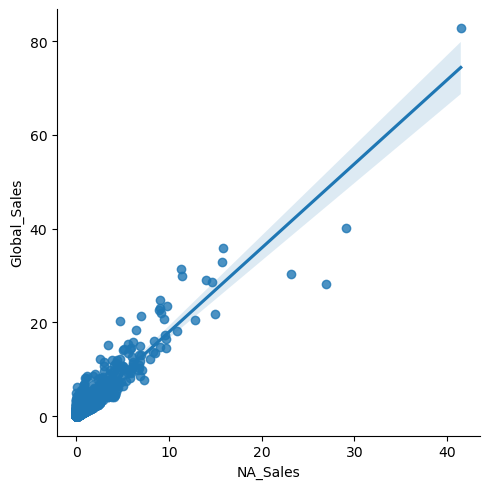

In [27]:
# LM plot pour visualiser la corrélation entre les ventes en Amérique du Nord et les ventes mondiales
sns.lmplot(x='NA_Sales', y='Global_Sales', data=df)

In [28]:
from bokeh.plotting import figure, show, output_notebook
output_notebook()

Loading BokehJS ...

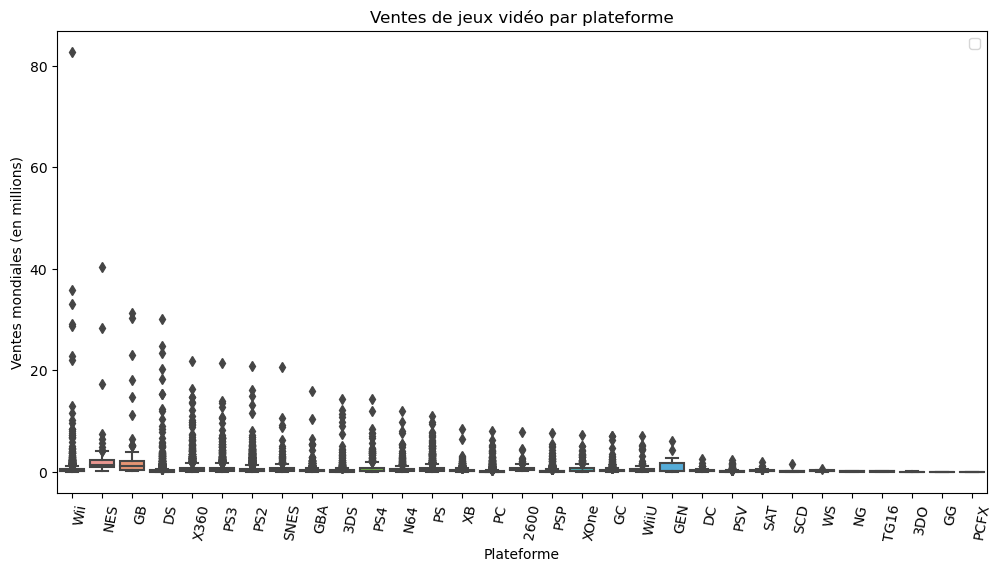

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Platform', y='Global_Sales', data=df)
plt.xlabel('Plateforme')
plt.ylabel('Ventes mondiales (en millions)')
plt.xticks(rotation=80, ha='left')
plt.title('Ventes de jeux vidéo par plateforme')
plt.legend()
plt.show()

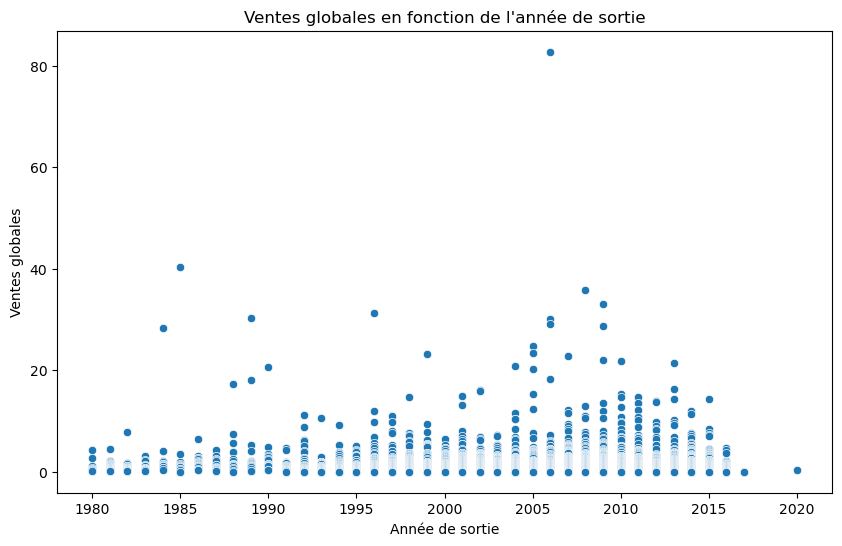

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Global_Sales', data=df)
plt.xlabel('Année de sortie')
plt.ylabel('Ventes globales')
plt.title('Ventes globales en fonction de l\'année de sortie')
plt.show()

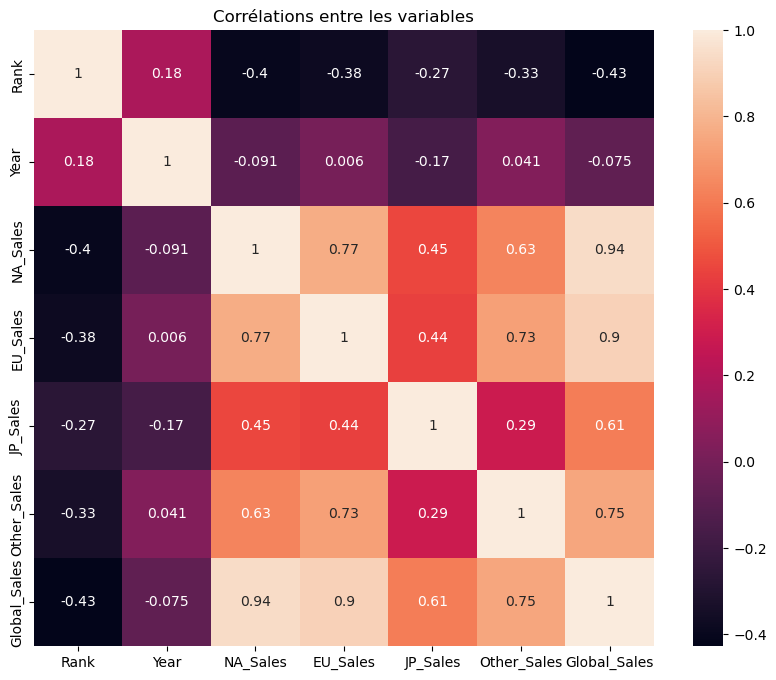

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.title('Corrélations entre les variables')
plt.show()

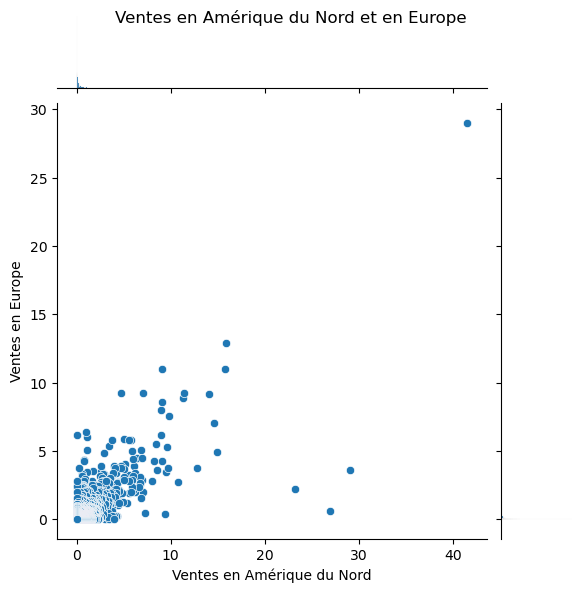

In [33]:
sns.jointplot(x='NA_Sales', y='EU_Sales', data=df)
plt.xlabel('Ventes en Amérique du Nord')
plt.ylabel('Ventes en Europe')
plt.suptitle('Ventes en Amérique du Nord et en Europe')
plt.show()

In [34]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Spectral6
from bokeh.transform import factor_cmap

# Création d'un objet ColumnDataSource pour les données
source = ColumnDataSource(data=df)

# Création de la figure
p = figure(x_axis_label='Ventes en Amérique du Nord',
           y_axis_label='Ventes globales')

# Ajout d'un cercle pour chaque point de données
p.circle(x='NA_Sales', y='Global_Sales', source=source,
         size=10, color=factor_cmap('Platform', palette=Spectral6, factors=df['Platform'].unique()))

# Ajout d'un outil de survol pour afficher les informations sur chaque point de données
hover = HoverTool(tooltips=[('Jeu', '@Name'),
                            ('Plateforme', '@Platform'),
                            ('Ventes en Amérique du Nord', '@NA_Sales'),
                            ('Ventes en Europe', '@EU_Sales'),
                            ('Ventes au Japon', '@JP_Sales'),
                            ('Ventes dans le reste du monde', '@Other_Sales'),
                            ('Ventes globales', '@Global_Sales')])

p.add_tools(hover)

# Affichage de la figure
show(p)

0
